<a href="https://colab.research.google.com/github/dibyanshi01/Ty-Btech-PBL/blob/main/FLGT_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Dibyanshi Tripathy

Batch: A3

Roll no: PC09 (1032190271)




**Introduction:**

Until recently, on-board computers were mainly related to secondary tasks, such as temperature control of the passenger compartment, opening car doors, and monitoring fuel, oil, and battery power; however, computers are increasingly driving tasks in some business models.

• Maintain reference speed and acceleration or keep a safe distance from other vehicles,

• Use infrared cameras to improve night vision

• Create maps and suggest alternative routes.


However, many street situations are still difficult to manage, especially in urban environments. Driving problems belong to a class that relies on the underlying system to reason and deal with uncertainty. In tasks related to environmental perception or driving, we must integrate all aspects of intelligence and human behavior so that the vehicle can control the driving mechanism like a human.

**Autonomous Vehicle System**

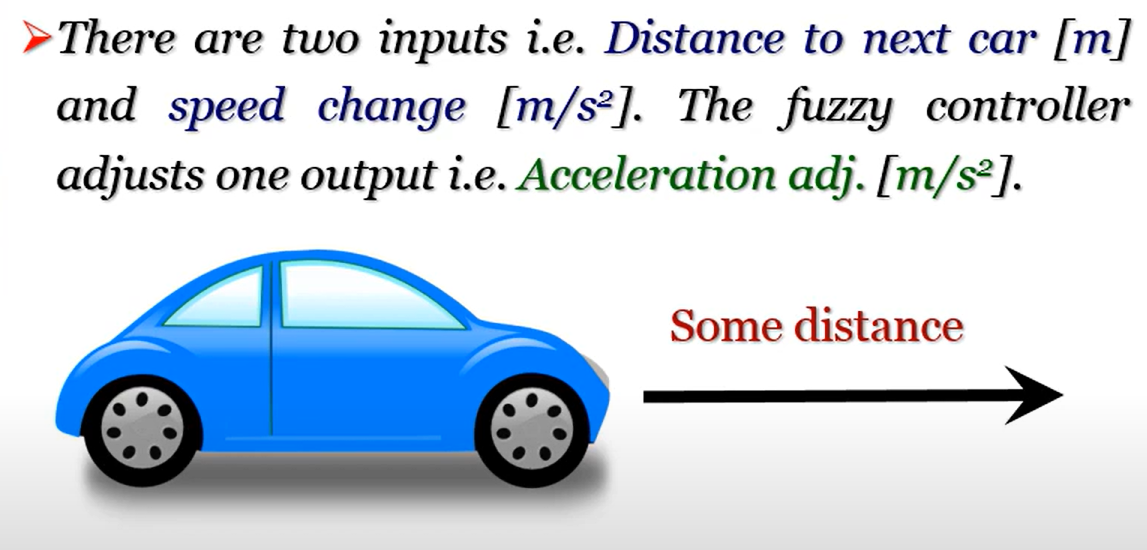

In [201]:
pip install scikit-fuzzy

In [200]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

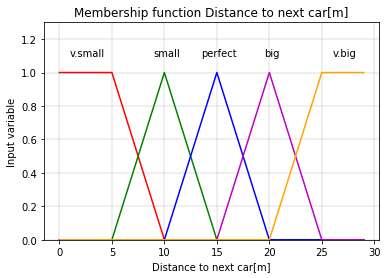

In [147]:
# Membership function Distance to next car[m]
temp1 = np.arange(0,30,1)
Ad = fuzz.trapmf(temp1,[0,0,5,10])
Bd = fuzz.trimf(temp1,[5,10,15])
Cd = fuzz.trimf(temp1,[10,15,20])
Dd = fuzz.trimf(temp1,[15,20,25])
Ed = fuzz.trapmf(temp1,[20,25,30,30])
fig,a = plt.subplots()
a.plot(temp1,Ad,'r',temp1,Bd,'g',temp1,Cd,'b',temp1,Dd,'m',temp1,Ed,'orange')
a.set_xlabel('Distance to next car[m]')
a.set_ylabel('Input variable')
plt.title("Membership function Distance to next car[m]") 
plt.text(1, 1.1, "v.small")
plt.text(9, 1.1, "small")
plt.text(13.5, 1.1, "perfect")
plt.text(19.5, 1.1, "big")
plt.text(26, 1.1, "v.big")
a.set_ylim(0,1.3)
a.grid(color='grey', linestyle='-', linewidth=0.25, alpha= 2)

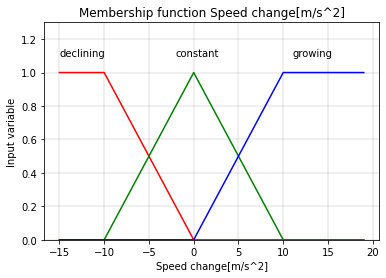

In [148]:
# Membership function Speed change[m/s^2]
temp2 = np.arange(-15,20,1)
As = fuzz.trapmf(temp2,[-15,-15,-10,0])
Bs = fuzz.trimf(temp2,[-10,0,10])
Cs = fuzz.trapmf(temp2,[0,10,20,20])
fig,a = plt.subplots()
a.plot(temp2,As,'r',temp2,Bs,'g',temp2,Cs,'b')
a.set_xlabel('Speed change[m/s^2]')
a.set_ylabel('Input variable')
plt.title("Membership function Speed change[m/s^2]") 
plt.text(-15, 1.1, "declining")
plt.text(-2, 1.1, "constant")
plt.text(11, 1.1, "growing")
a.set_ylim(0,1.3)
a.grid(color='grey', linestyle='-', linewidth=0.25, alpha= 2)

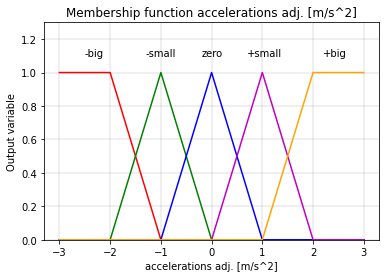

In [149]:
# Membership function accelerations adj. [m/s^2]
temp = np.arange(-3,4,1)
Aa = fuzz.trapmf(temp,[-3,-3,-2,-1])
Ba = fuzz.trimf(temp,[-2,-1,0])
Ca = fuzz.trimf(temp,[-1,0,1])
Da = fuzz.trimf(temp,[0,1,2])
Ea = fuzz.trapmf(temp,[1,2,3,3])
fig,a = plt.subplots()
a.plot(temp,Aa,'r',temp,Ba,'g',temp,Ca,'b',temp,Da,'m',temp,Ea,'orange')
a.set_xlabel('accelerations adj. [m/s^2]')
a.set_ylabel('Output variable')
plt.title("Membership function accelerations adj. [m/s^2]") 
plt.text(-2.5, 1.1, "-big")
plt.text(-1.3, 1.1, "-small")
plt.text(-0.2, 1.1, "zero")
plt.text(0.7, 1.1, "+small")
plt.text(2.2, 1.1, "+big")
a.set_ylim(0,1.3)
a.grid(color='grey', linestyle='-', linewidth=0.25, alpha= 2)

**Interference Engine:**

4 Rules are:

* If Distance is Small[0.4] and Speed is Declining[0.25] then maintain acceleration[0.25].

* If Distance is Small[0.4] and Speed is Constant[0.75] then Acceleration Adjustment is  -small[0.4].

* If Distance is perfect[0.6] and Speed is Declining[0.25] then Acceleration Adjustment is +small[0.25].

* If Distance is perfect[0.6] and Speed is Constant[0.75] then maintain acceleration[0.6].

In [202]:
x1 = np.array([13])
x2 = np.array([-2.5])

**RULE_1**

In [203]:
Dm1 = fuzz.trimf(x1,[5,10,15])
Sm1 = fuzz.trapmf(x2,[-15,-15,-10,0])

In [152]:
Dm1,Sm1

(array([0.4]), array([0.25]))

In [153]:
minimum1 = min(Dm1,Sm1)
minimum1

array([0.25])

In [179]:
R1 = np.fmin(minimum1,Ca)

**RULE_2**

In [155]:
Dm2 = fuzz.trimf(x1,[5,10,15])
Sm2 = fuzz.trimf(x2,[-10,0,10])

In [156]:
Dm2,Sm2

(array([0.4]), array([0.75]))

In [157]:
minimum2 = min(Dm2,Sm2)
minimum2

array([0.4])

In [158]:
R2 = np.fmin(minimum2,Ba)

**RULE_3**

In [159]:
Dm3 = fuzz.trimf(x1,[10,15,20])
Sm3 = fuzz.trapmf(x2,[-15,-15,-10,0])

In [160]:
Dm3,Sm3

(array([0.6]), array([0.25]))

In [161]:
minimum3 = min(Dm3,Sm3)
minimum3

array([0.25])

In [162]:
R3 = np.fmin(minimum3,Da)

**RULE_4**

In [163]:
Dm4 = fuzz.trimf(x1,[10,15,20])
Sm4 = fuzz.trimf(x2,[-10,0,10])

In [164]:
Dm4,Sm4

(array([0.6]), array([0.75]))

In [165]:
minimum4 = min(Dm4,Sm4)
minimum4

array([0.6])

In [166]:
R4 = np.fmin(minimum4,Ca)

**PLOT**

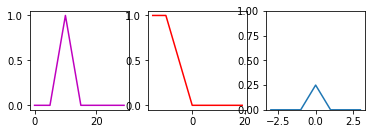

In [181]:
plt.subplot(2,3,1)
plt.plot(temp1,Bd,'m')
plt.subplot(2,3,2)
plt.plot(temp2,As,'r')
plt.subplot(2,3,3)
plt.ylim(0,1)
plt.plot(temp,R1)

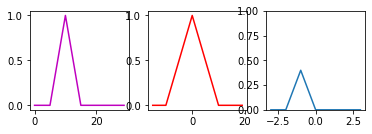

In [182]:
plt.subplot(2,3,4)
plt.plot(temp1,Bd,'m')
plt.subplot(2,3,5)
plt.plot(temp2,Bs,'r')
plt.subplot(2,3,6)
plt.ylim(0,1)
plt.plot(temp,R2)

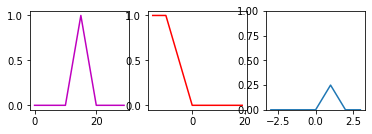

In [183]:
plt.subplot(2,3,1)
plt.plot(temp1,Cd,'m')
plt.subplot(2,3,2)
plt.plot(temp2,As,'r')
plt.subplot(2,3,3)
plt.ylim(0,1)
plt.plot(temp,R3)

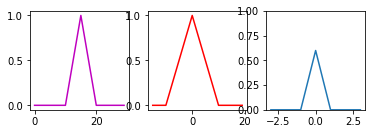

In [184]:
plt.subplot(2,3,4)
plt.plot(temp1,Cd,'m')
plt.subplot(2,3,5)
plt.plot(temp2,Bs,'r')
plt.subplot(2,3,6)
plt.ylim(0,1)
plt.plot(temp,R4)

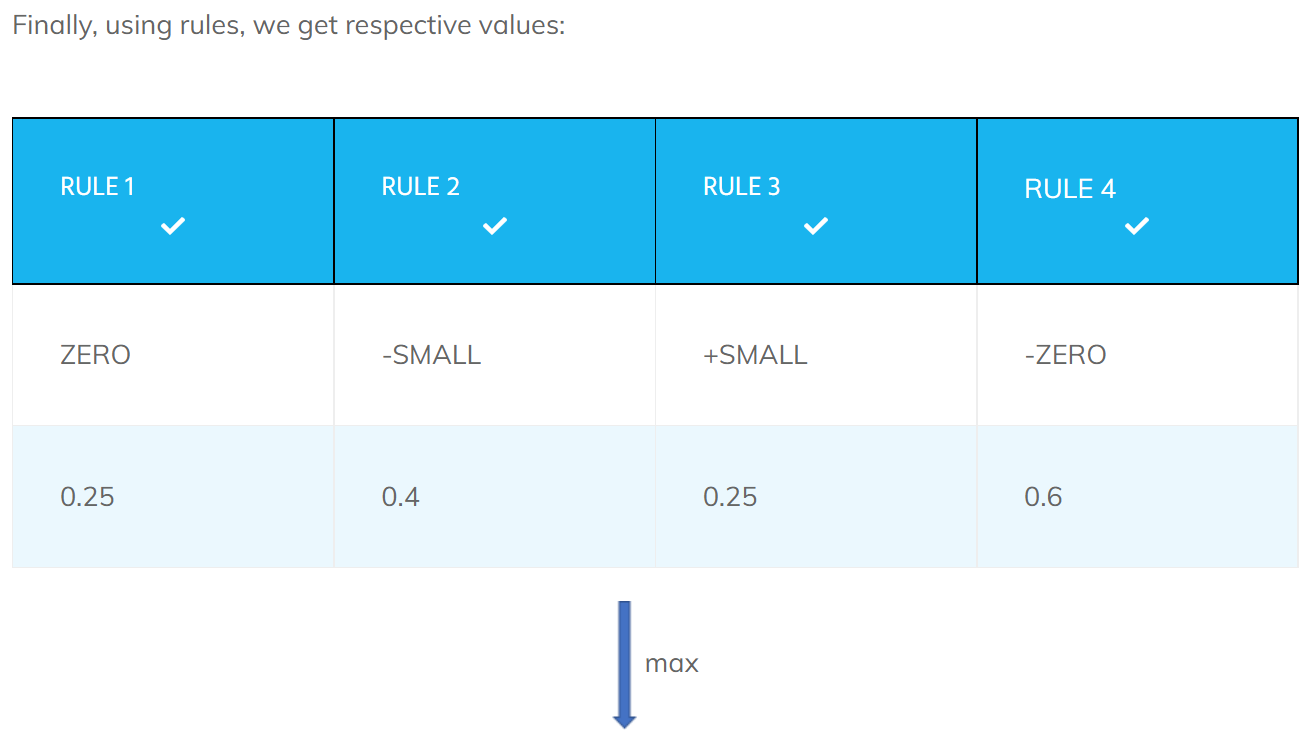

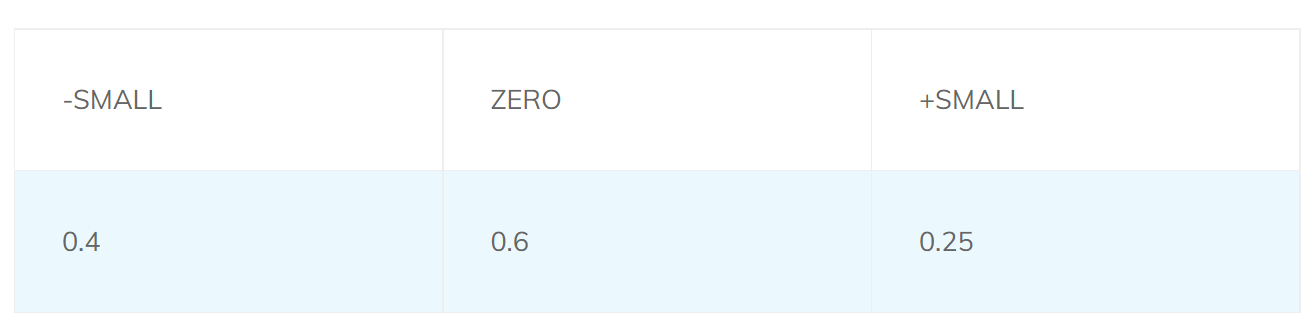

In [ ]:
# Plotting the max outputs

(0.0, 1.0)

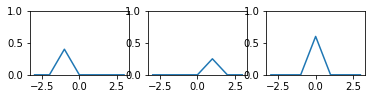

In [185]:
plt.subplot(3,3,7)
plt.ylim(0,1)
plt.plot(temp,R2)
plt.subplot(3,3,8)
plt.ylim(0,1)
plt.plot(temp,R3)
plt.subplot(3,3,9)
plt.ylim(0,1)
plt.plot(temp,R4)
plt.ylim(0,1)

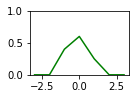

In [189]:
max1 = np.fmax(R2,R3)
max2 = np.fmax(max1,R4)
plt.subplot(3,3,9)
plt.ylim(0,1)
plt.plot(temp,max2,'g')

The defuzzified value:  -0.12
Defuzzification



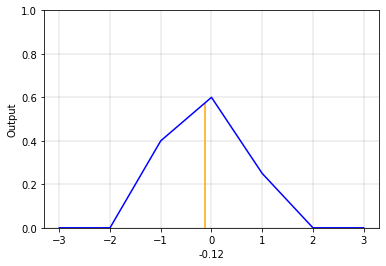

In [204]:
defuzz=fuzz.defuzz(temp,max2,'centroid')
print("The defuzzified value: ",defuzz)
ymax=fuzz.interp_membership(temp,max2,defuzz)
fig,f=plt.subplots()
f.plot(temp,max2,'b')
f.vlines(defuzz,0,ymax,label='centroid',color='orange')
f.set_ylim(0,1)
print('Defuzzification\n')
f.set_xlabel('-0.12')
f.set_ylabel('Output')
f.grid(color='grey', linestyle='-', linewidth=0.25, alpha= 2)

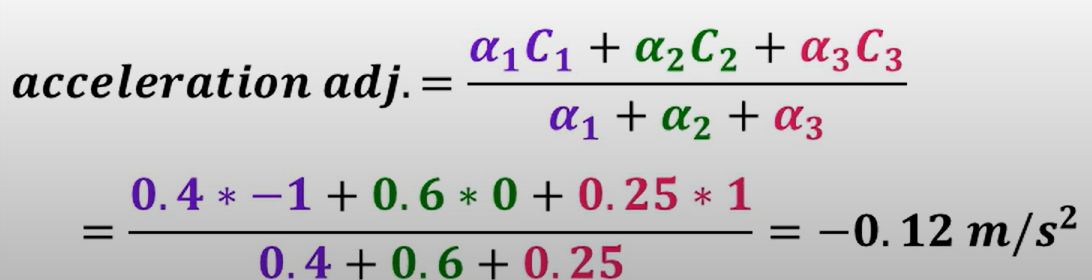

**Conclusion:**

We get our required resultant which is -0.12m/s^2 in this case. This loop continues in an autonomous vehicle while driving to adjust acceleration concerning other vehicles present on the road.